In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lobs_btc = pd.read_csv('../data/lobs_btc.csv', skipinitialspace=True, low_memory=True)
trades_btc = pd.read_csv('../data/trades_btc.csv', skipinitialspace=True, low_memory=True)
lobs_eth = pd.read_csv('../data/lobs_eth.csv', skipinitialspace=True, low_memory=True)
trades_eth = pd.read_csv('../data/trades_eth.csv', skipinitialspace=True, low_memory=True)

Приводим время из таймстампа к дате, а тип ордера к строке:

In [2]:
lobs_btc['receive_ts'] = pd.to_datetime(lobs_btc['receive_ts'])
lobs_btc['exchange_ts'] = pd.to_datetime(lobs_btc['exchange_ts'])
trades_btc['receive_ts'] = pd.to_datetime(trades_btc['receive_ts'])
trades_btc['exchange_ts'] = pd.to_datetime(trades_btc['exchange_ts'])
trades_btc.astype({'aggro_side': 'string'})

lobs_eth['receive_ts'] = pd.to_datetime(lobs_eth['receive_ts'])
lobs_eth['exchange_ts'] = pd.to_datetime(lobs_eth['exchange_ts'])
trades_eth['receive_ts'] = pd.to_datetime(trades_eth['receive_ts'])
trades_eth['exchange_ts'] = pd.to_datetime(trades_eth['exchange_ts'])
trades_eth.astype({'aggro_side': 'string'})

,receive_ts,exchange_ts,aggro_side,price,size
0,2022-06-23 00:00:02.218452815,2022-06-23 00:00:02.217,BID,1049.45,0.062
1,2022-06-23 00:00:02.624182869,2022-06-23 00:00:02.623,BID,1049.45,0.726
2,2022-06-23 00:00:02.624767109,2022-06-23 00:00:02.623,BID,1049.45,0.001
3,2022-06-23 00:00:02.626135583,2022-06-23 00:00:02.623,ASK,1049.44,0.022
4,2022-06-23 00:00:02.627026454,2022-06-23 00:00:02.624,BID,1049.45,0.005
...,...,...,...,...,...
4873798,2022-06-23 23:59:40.700723809,2022-06-23 23:59:40.700,BID,1143.63,0.005
4873799,2022-06-23 23:59:40.953848112,2022-06-23 23:59:40.953,ASK,1143.62,8.744
4873800,2022-06-23 23:59:40.991774028,2022-06-23 23:59:40.991,BID,1143.63,0.066
4873801,2022-06-23 23:59:41.021533873,2022-06-23 23:59:41.020,ASK,1143.62,0.174


# 1 задание. 

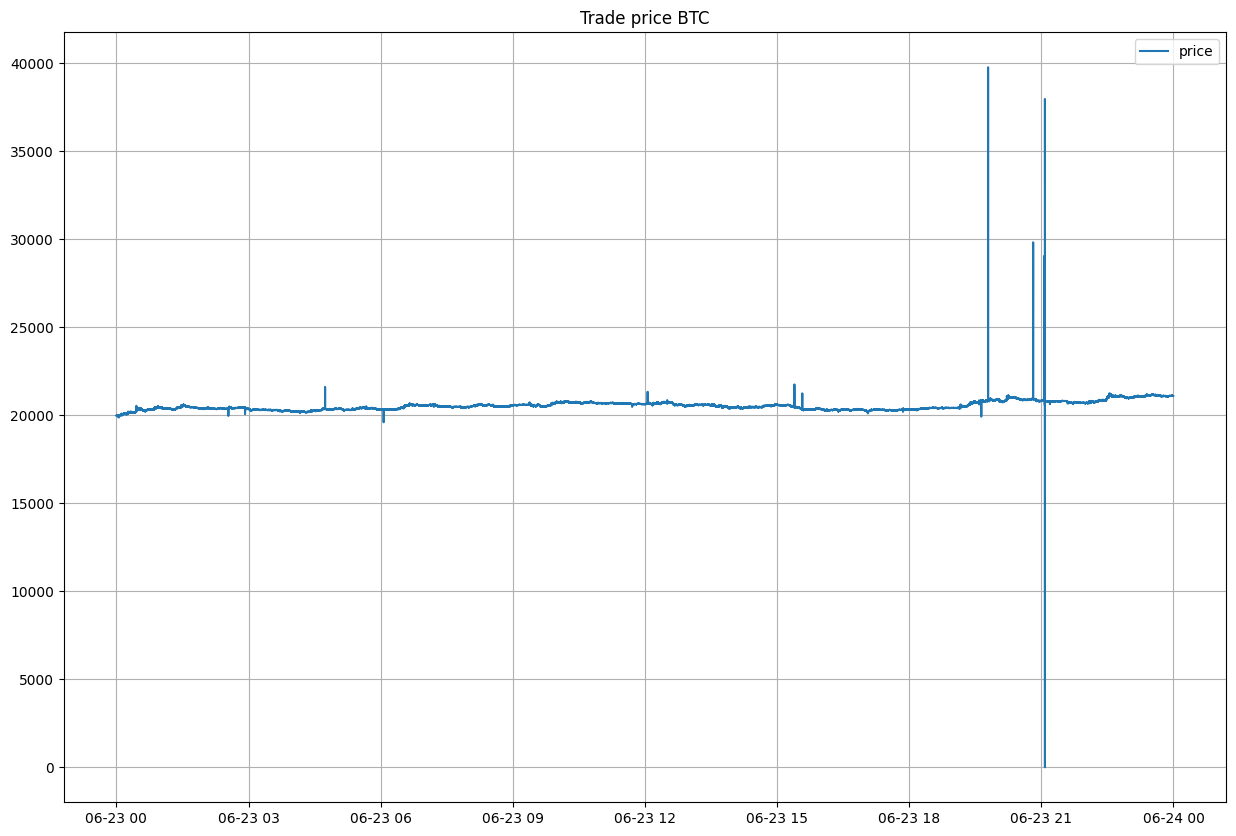

In [3]:
plt.figure(figsize=(15, 10))
plt.plot(trades_btc['receive_ts'], trades_btc['price'], label='price')
plt.legend()
plt.grid()
plt.title('Trade price BTC')
plt.show()

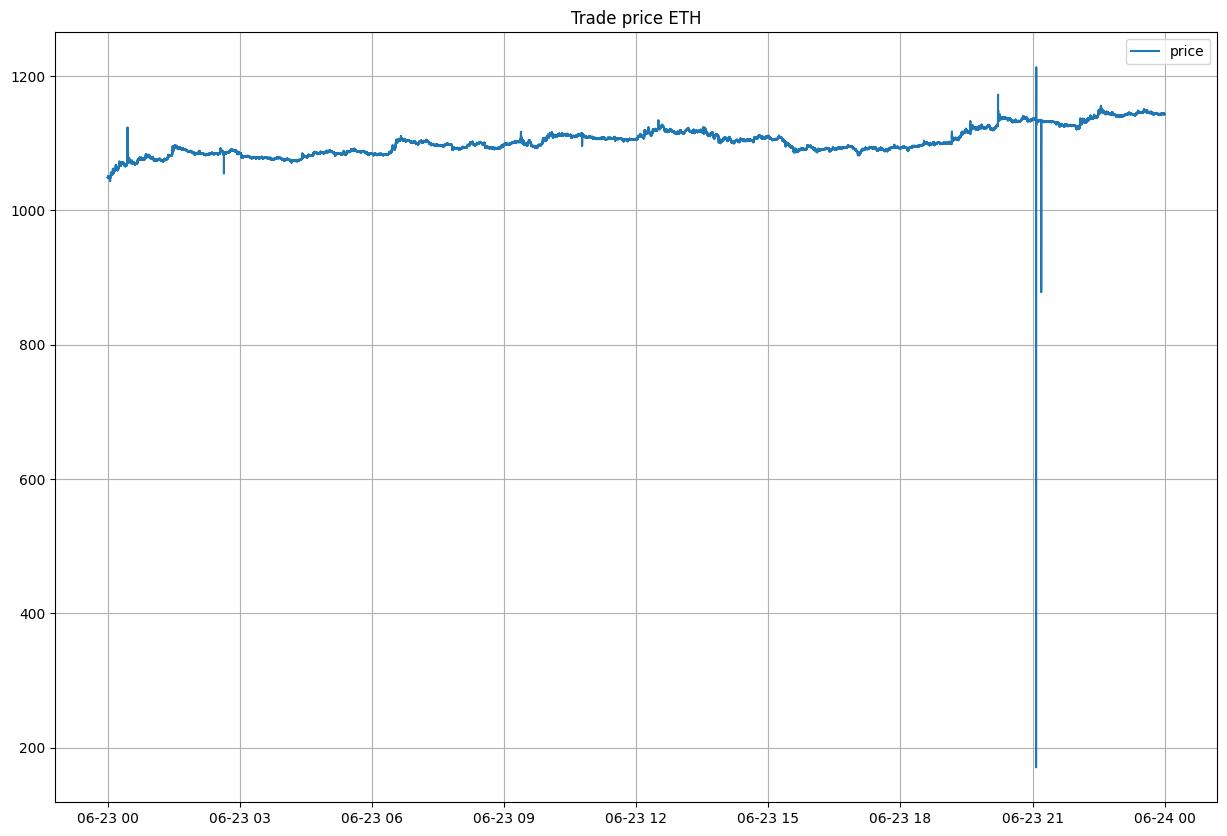

In [4]:
plt.figure(figsize=(15, 10))
plt.plot(trades_eth['receive_ts'], trades_eth['price'], label='price')
plt.legend()
plt.grid()
plt.title('Trade price ETH')
plt.show()

Далее убираем выбросы из данных и строим более приятный график trade price

In [5]:
trades_btc.dropna()
lobs_btc.dropna()
trades_btc = trades_btc[abs(trades_btc['price'] - trades_btc['price'].mean()) < 2000]

trades_eth.dropna()
lobs_eth.dropna()
trades_eth = trades_eth[abs(trades_eth['price'] - trades_eth['price'].mean()) < 500]

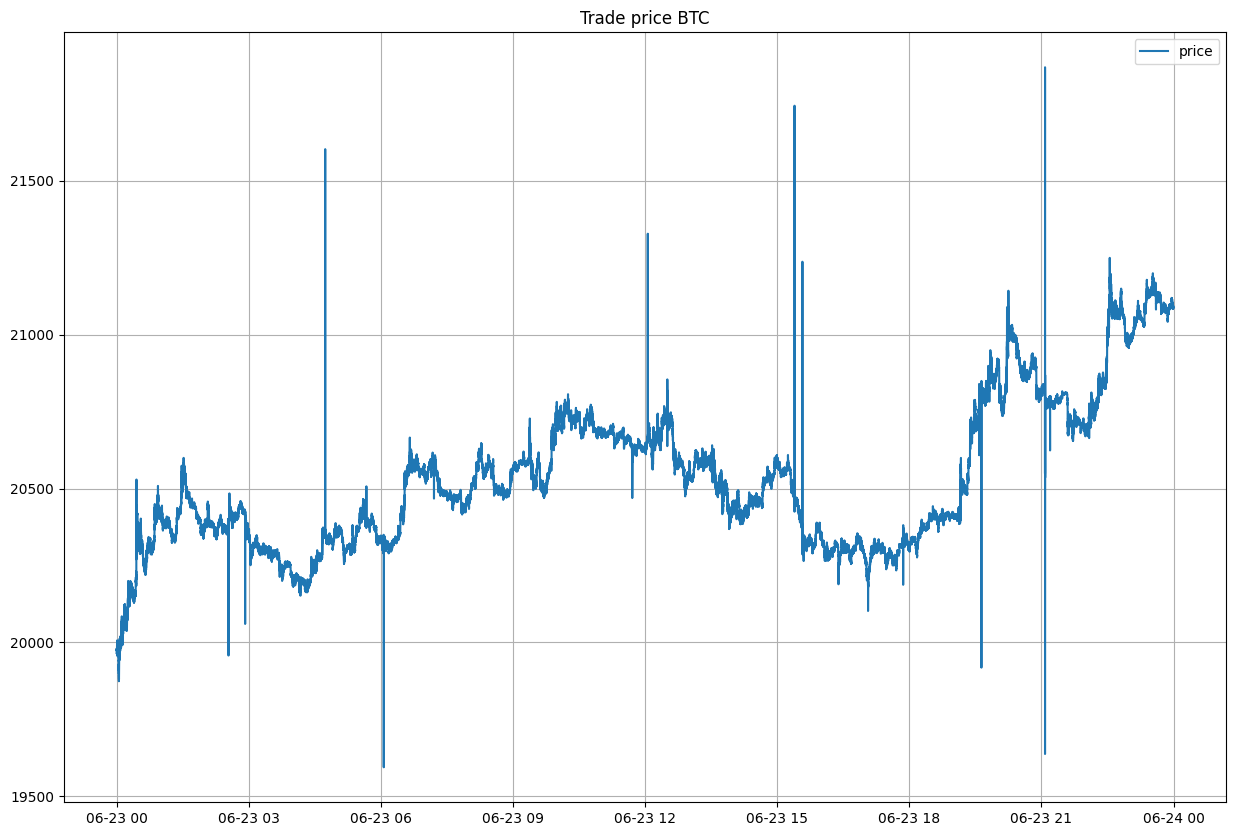

In [6]:
plt.figure(figsize=(15, 10))
plt.plot(trades_btc['receive_ts'], trades_btc['price'], label='price')
plt.legend()
plt.grid()
plt.title('Trade price BTC')
plt.show()

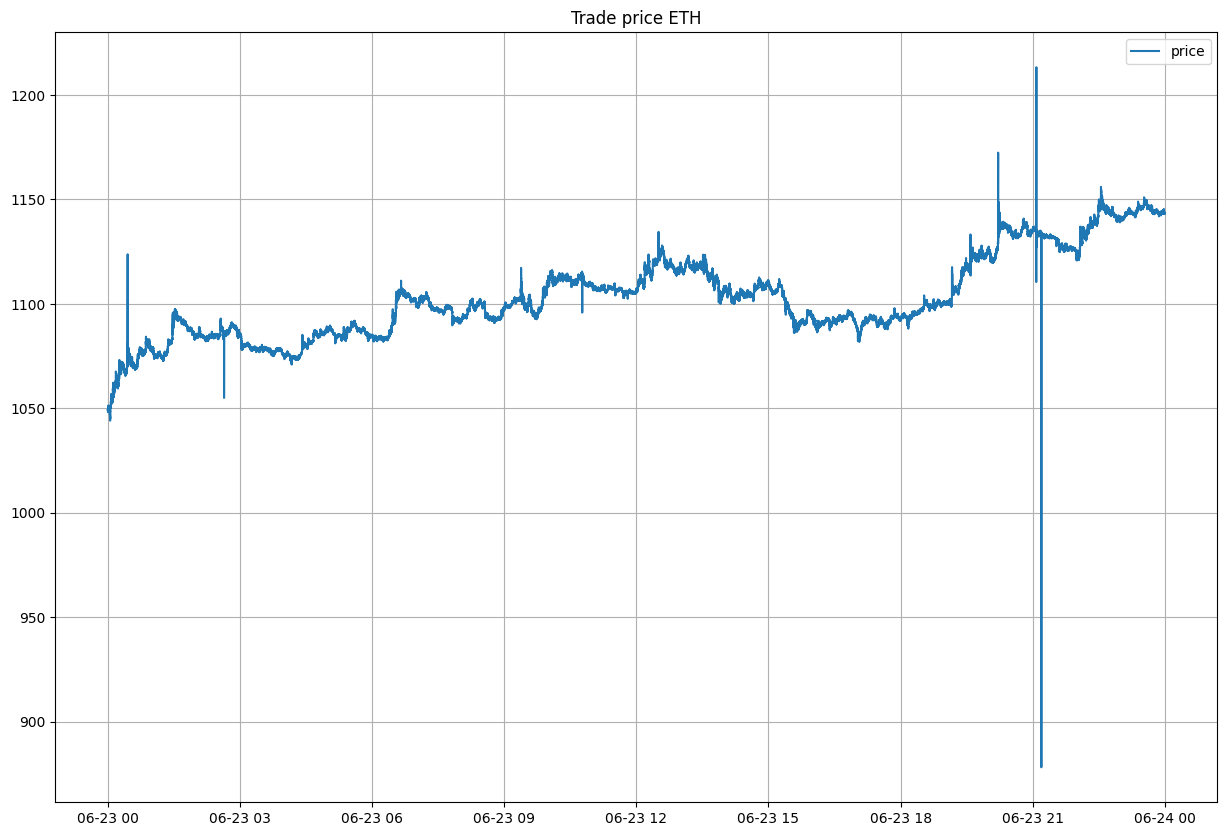

In [7]:
plt.figure(figsize=(15, 10))
plt.plot(trades_eth['receive_ts'], trades_eth['price'], label='price')
plt.legend()
plt.grid()
plt.title('Trade price ETH')
plt.show()

### График best price от времени 

Bid и ask очень близки, как видно на этом графике

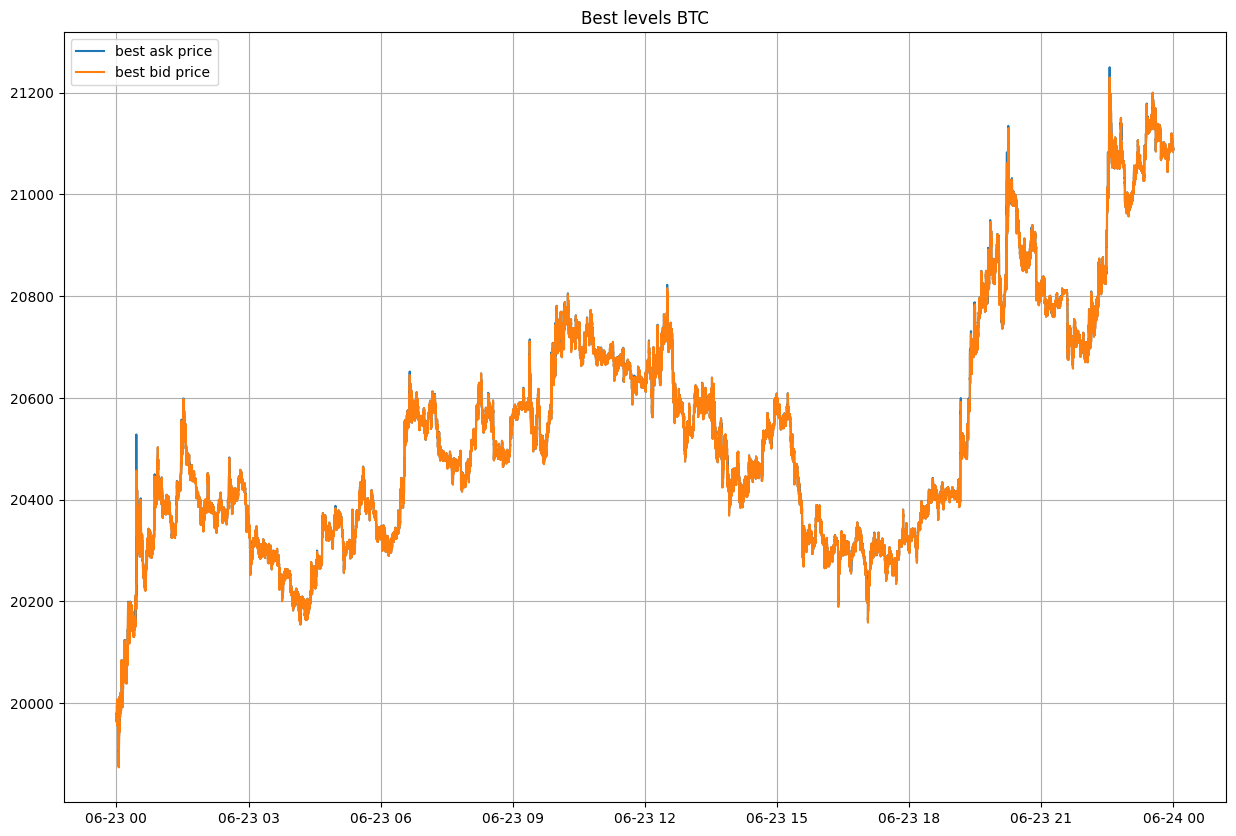

In [8]:
plt.figure(figsize=(15, 10))
plt.plot(lobs_btc['receive_ts'], lobs_btc['btcusdt:Binance:LinearPerpetual_ask_price_0'], label='best ask price')
plt.plot(lobs_btc['receive_ts'], lobs_btc['btcusdt:Binance:LinearPerpetual_bid_price_0'], label='best bid price')
plt.legend()
plt.grid()
plt.title('Best levels BTC')
plt.show()

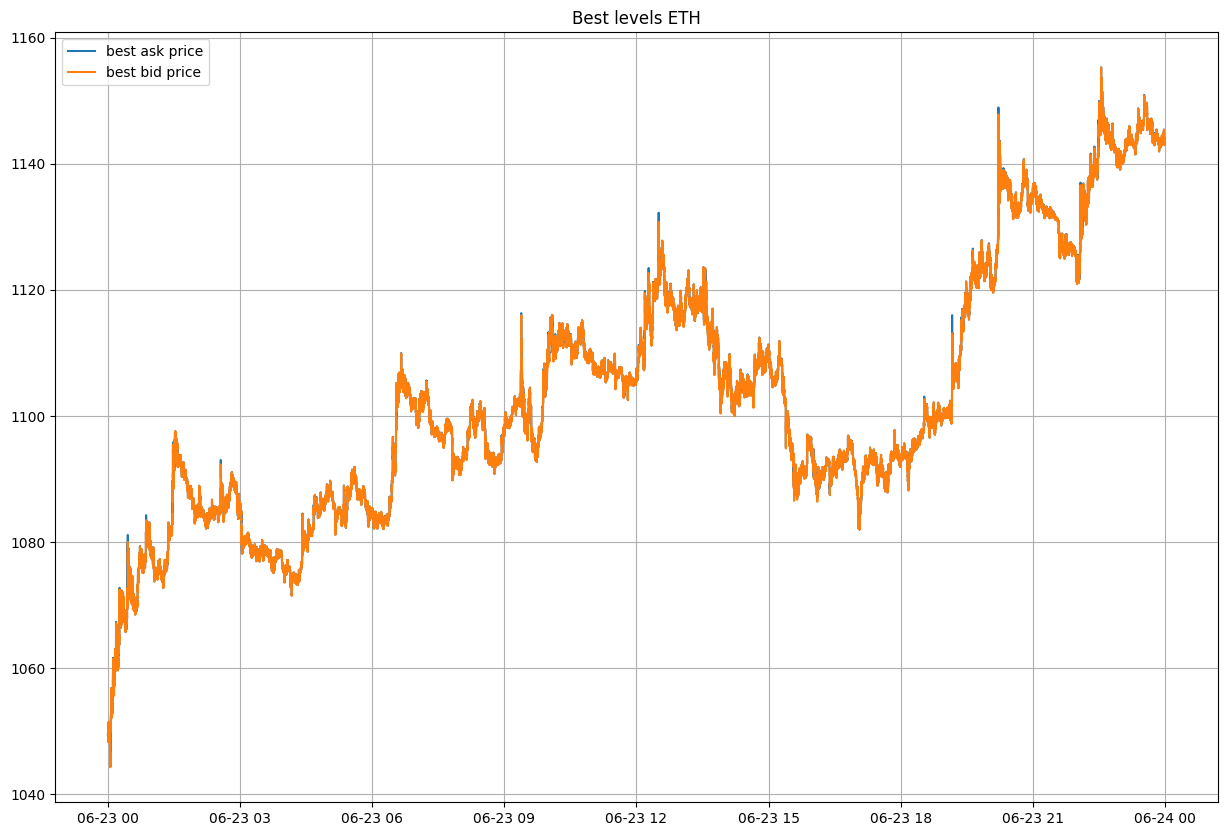

In [9]:
plt.figure(figsize=(15, 10))
plt.plot(lobs_eth['receive_ts'], lobs_eth['ethusdt:Binance:LinearPerpetual_ask_price_0'], label='best ask price')
plt.plot(lobs_eth['receive_ts'], lobs_eth['ethusdt:Binance:LinearPerpetual_bid_price_0'], label='best bid price')
plt.legend()
plt.grid()
plt.title('Best levels ETH')
plt.show()

Отдельно на всякий случай нарисовал best ask price, потому что на прошлом графике видно по сути тольк bid

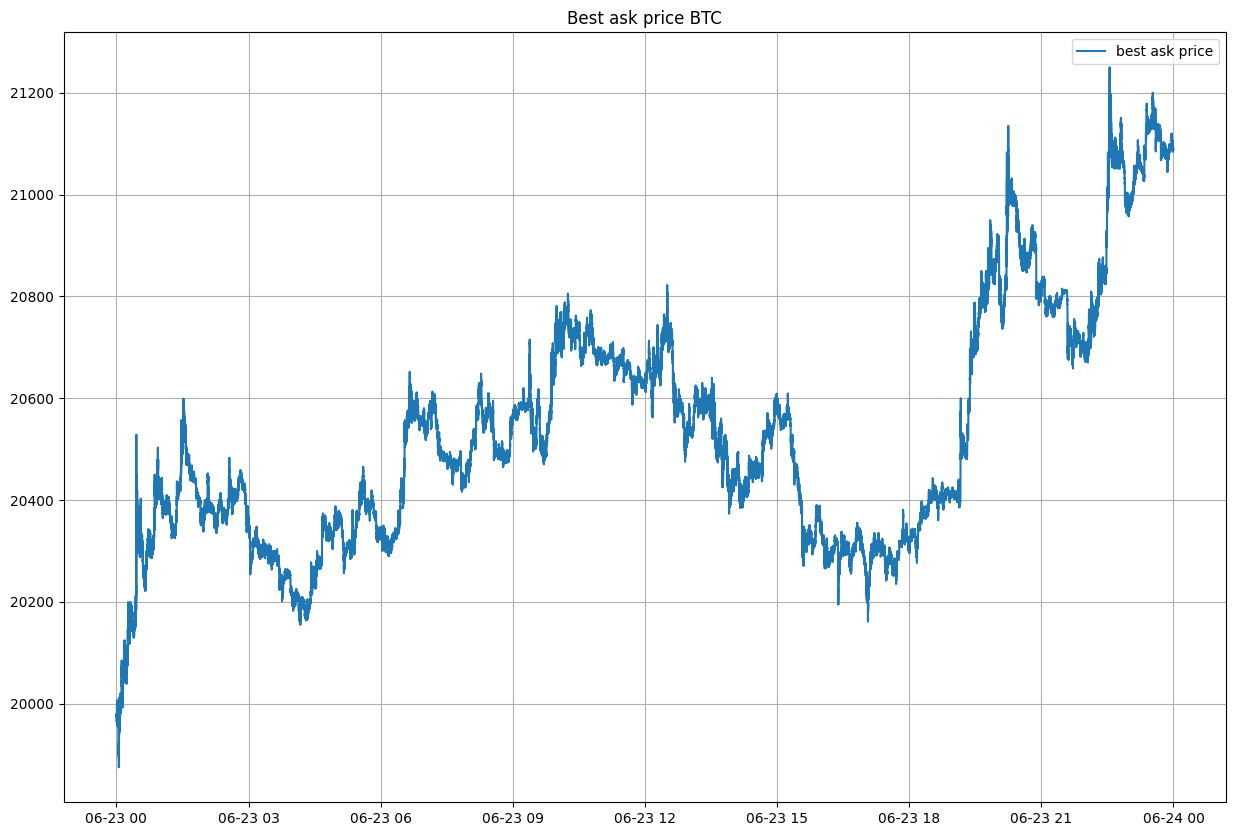

In [10]:
plt.figure(figsize=(15, 10))
plt.plot(lobs_btc['receive_ts'], lobs_btc['btcusdt:Binance:LinearPerpetual_ask_price_0'], label='best ask price')
plt.legend()
plt.grid()
plt.title('Best ask price BTC')
plt.show()

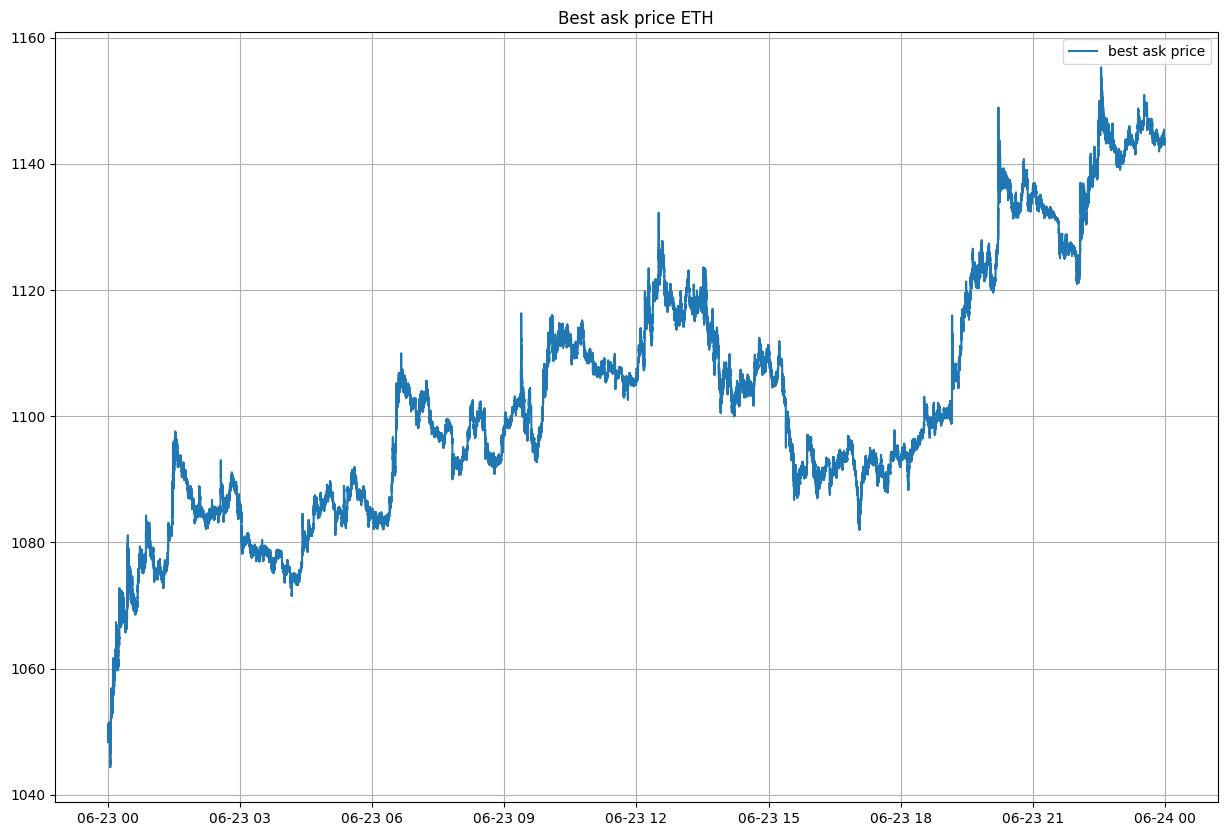

In [12]:
plt.figure(figsize=(15, 10))
plt.plot(lobs_eth['receive_ts'], lobs_eth['ethusdt:Binance:LinearPerpetual_ask_price_0'], label='best ask price')
plt.legend()
plt.grid()
plt.title('Best ask price ETH')
plt.show()

# 2 задание. Считаю статистики для уровней стакана

In [13]:
def stats(series):
    return {'mean': round(series.mean(), 3), 
            'median': round(series.median(), 3), 
            'variance': round(series.var(), 3), 
            '0.05 quantile': round(series.quantile(0.05), 3),
            '0.95 quantile': round(series.quantile(0.95), 3)}

In [14]:
def volume_stats(level, coin, side):
    if coin == 'btc':
        return stats(lobs_btc[f'btcusdt:Binance:LinearPerpetual_{side}_vol_{level}']) 
    elif coin == 'eth':
        return stats(lobs_eth[f'ethusdt:Binance:LinearPerpetual_{side}_vol_{level}'])
    
def total_volume_stats(level, coin):
    if coin == 'btc':
        return stats(lobs_btc[f'btcusdt:Binance:LinearPerpetual_ask_vol_{level}'] 
                 + lobs_btc[f'btcusdt:Binance:LinearPerpetual_bid_vol_{level}']) 
    elif coin == 'eth':
        return stats(lobs_eth[f'ethusdt:Binance:LinearPerpetual_ask_vol_{level}'] 
                 + lobs_eth[f'ethusdt:Binance:LinearPerpetual_bid_vol_{level}']) 

Статистики для BTC

In [15]:
for i in range(0, 3):
    print(f'ask_stats for level {i}: ', volume_stats(i, 'btc', 'ask'))
    print(f'bid_stats for level {i}: ', volume_stats(i, 'btc', 'bid'))
    print(f'total_stats for level {i}: ', total_volume_stats(i, 'btc'), end='\n================\n')

ask_stats for level 0:  {'mean': 2.561, 'median': 1.358, 'variance': 18.338, '0.05 quantile': 0.014, '0.95 quantile': 8.907}
bid_stats for level 0:  {'mean': 2.683, 'median': 1.377, 'variance': 31.227, '0.05 quantile': 0.012, '0.95 quantile': 9.208}
total_stats for level 0:  {'mean': 5.244, 'median': 4.062, 'variance': 45.223, '0.05 quantile': 0.598, '0.95 quantile': 12.989}
ask_stats for level 1:  {'mean': 0.507, 'median': 0.071, 'variance': 4.053, '0.05 quantile': 0.001, '0.95 quantile': 2.132}
bid_stats for level 1:  {'mean': 0.531, 'median': 0.067, 'variance': 7.803, '0.05 quantile': 0.001, '0.95 quantile': 2.171}
total_stats for level 1:  {'mean': 1.038, 'median': 0.401, 'variance': 11.771, '0.05 quantile': 0.004, '0.95 quantile': 4.141}
ask_stats for level 2:  {'mean': 0.491, 'median': 0.076, 'variance': 3.918, '0.05 quantile': 0.001, '0.95 quantile': 1.891}
bid_stats for level 2:  {'mean': 0.499, 'median': 0.071, 'variance': 5.714, '0.05 quantile': 0.001, '0.95 quantile': 1.915}

Статистики для ETH

In [16]:
for i in range(0, 3):
    print(f'ask_stats for level {i}: ', volume_stats(i, 'eth', 'ask'))
    print(f'bid_stats for level {i}: ', volume_stats(i, 'eth', 'bid'))
    print(f'total_stats for level {i}: ', total_volume_stats(i, 'eth'), end='\n================\n')

ask_stats for level 0:  {'mean': 19.748, 'median': 11.013, 'variance': 2060.639, '0.05 quantile': 0.176, '0.95 quantile': 64.931}
bid_stats for level 0:  {'mean': 19.742, 'median': 10.917, 'variance': 2007.862, '0.05 quantile': 0.137, '0.95 quantile': 64.729}
total_stats for level 0:  {'mean': 39.491, 'median': 29.003, 'variance': 3936.571, '0.05 quantile': 5.493, '0.95 quantile': 95.594}
ask_stats for level 1:  {'mean': 5.183, 'median': 1.006, 'variance': 535.761, '0.05 quantile': 0.011, '0.95 quantile': 21.406}
bid_stats for level 1:  {'mean': 5.196, 'median': 1.0, 'variance': 540.925, '0.05 quantile': 0.011, '0.95 quantile': 21.427}
total_stats for level 1:  {'mean': 10.378, 'median': 4.398, 'variance': 1071.15, '0.05 quantile': 0.072, '0.95 quantile': 37.075}
ask_stats for level 2:  {'mean': 4.864, 'median': 1.134, 'variance': 441.874, '0.05 quantile': 0.011, '0.95 quantile': 18.122}
bid_stats for level 2:  {'mean': 4.909, 'median': 1.102, 'variance': 415.715, '0.05 quantile': 0.01

# 3 задание. Гистограммы распределений

Везде используется логарифмическая шкала, потому что иначе гистограмма нечитаемая.

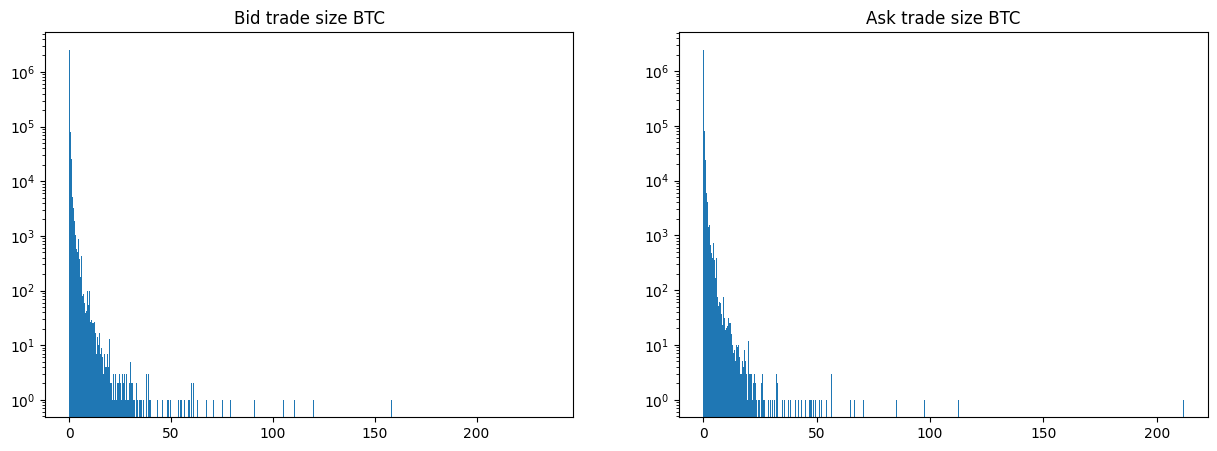

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].hist(trades_btc[trades_btc['aggro_side'] == 'BID']['size'], 1000, log=True)
ax[1].hist(trades_btc[trades_btc['aggro_side'] == 'ASK']['size'], 1000, log=True)
ax[0].set_title('Bid trade size BTC')
ax[1].set_title('Ask trade size BTC')
plt.show()

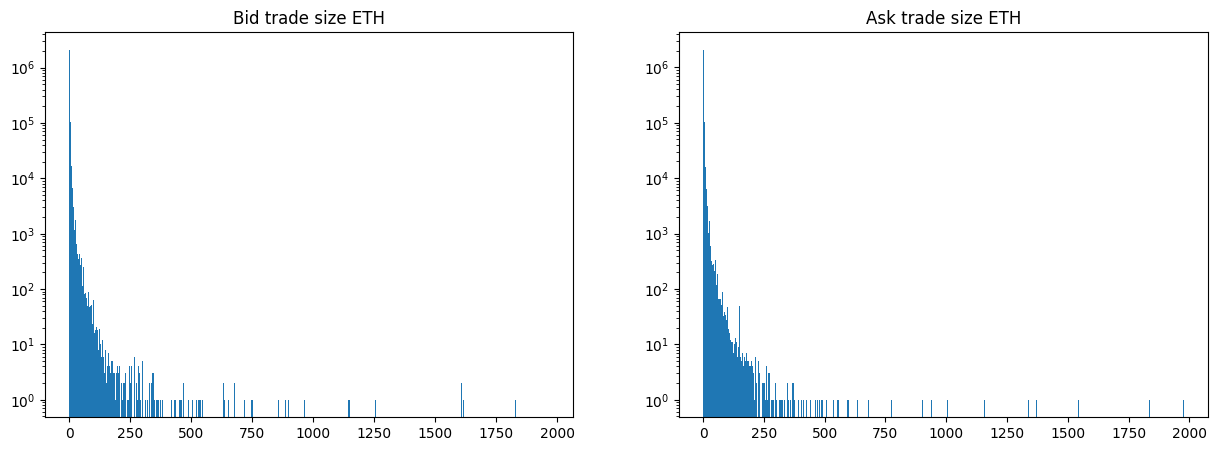

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].hist(trades_eth[trades_eth['aggro_side'] == 'BID']['size'], 1000, log=True)
ax[1].hist(trades_eth[trades_eth['aggro_side'] == 'ASK']['size'], 1000, log=True)
ax[0].set_title('Bid trade size ETH')
ax[1].set_title('Ask trade size ETH')
plt.show()

Далее считаем кумулятивные объемы уровней стакана:

In [19]:
lobs_btc.rename(columns={'btcusdt:Binance:LinearPerpetual_ask_vol_0': 'ask_total_vol_0',
                         'btcusdt:Binance:LinearPerpetual_bid_vol_0': 'bid_total_vol_0'}, inplace=True)
lobs_eth.rename(columns={'ethusdt:Binance:LinearPerpetual_ask_vol_0': 'ask_total_vol_0',
                         'ethusdt:Binance:LinearPerpetual_bid_vol_0': 'bid_total_vol_0'}, inplace=True)
for i in range(1,5):
    lobs_btc[f'ask_total_vol_{i}'] = lobs_btc[f'ask_total_vol_{i-1}'] + lobs_btc[f'btcusdt:Binance:LinearPerpetual_ask_vol_{i}']
    lobs_btc[f'bid_total_vol_{i}'] = lobs_btc[f'bid_total_vol_{i-1}'] + lobs_btc[f'btcusdt:Binance:LinearPerpetual_bid_vol_{i}']
    lobs_eth[f'ask_total_vol_{i}'] = lobs_eth[f'ask_total_vol_{i-1}'] + lobs_eth[f'ethusdt:Binance:LinearPerpetual_ask_vol_{i}']
    lobs_eth[f'bid_total_vol_{i}'] = lobs_eth[f'bid_total_vol_{i-1}'] + lobs_eth[f'ethusdt:Binance:LinearPerpetual_bid_vol_{i}']

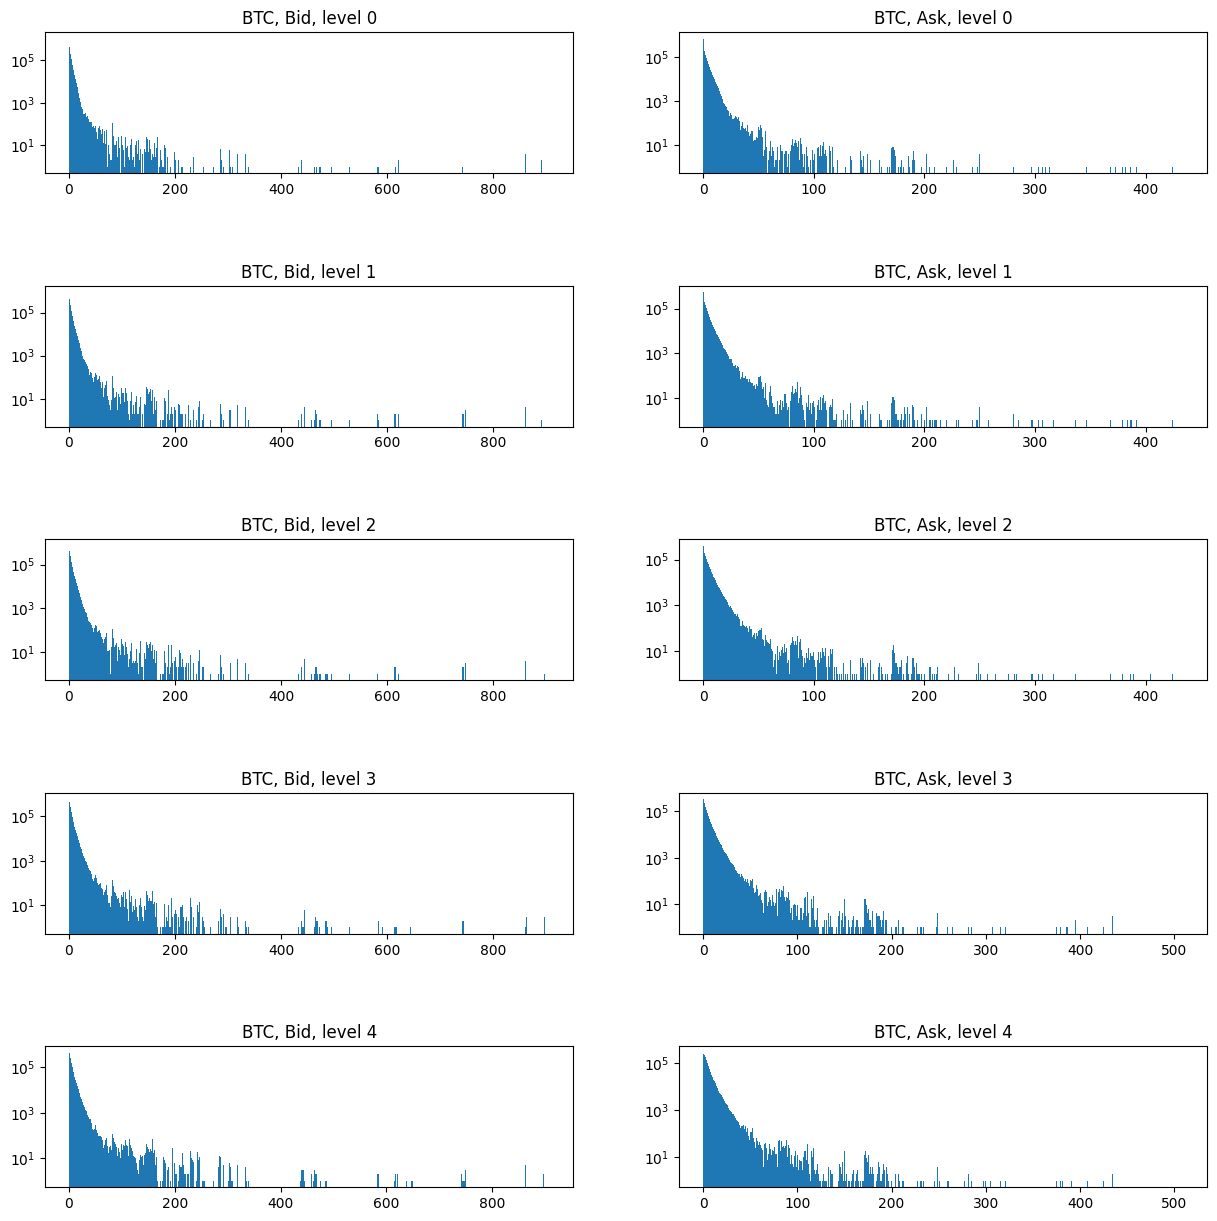

In [20]:
fig, ax = plt.subplots(5, 2, figsize=(15,15))
for i in range(0, 5):
    ax[i, 0].hist(lobs_btc[f'bid_total_vol_{i}'], 1000, log=True)
    ax[i, 0].set_title(f'BTC, Bid, level {i}')
    ax[i, 1].hist(lobs_btc[f'ask_total_vol_{i}'], 1000, log=True)
    ax[i, 1].set_title(f'BTC, Ask, level {i}')
plt.subplots_adjust(hspace=0.8)    
plt.show()

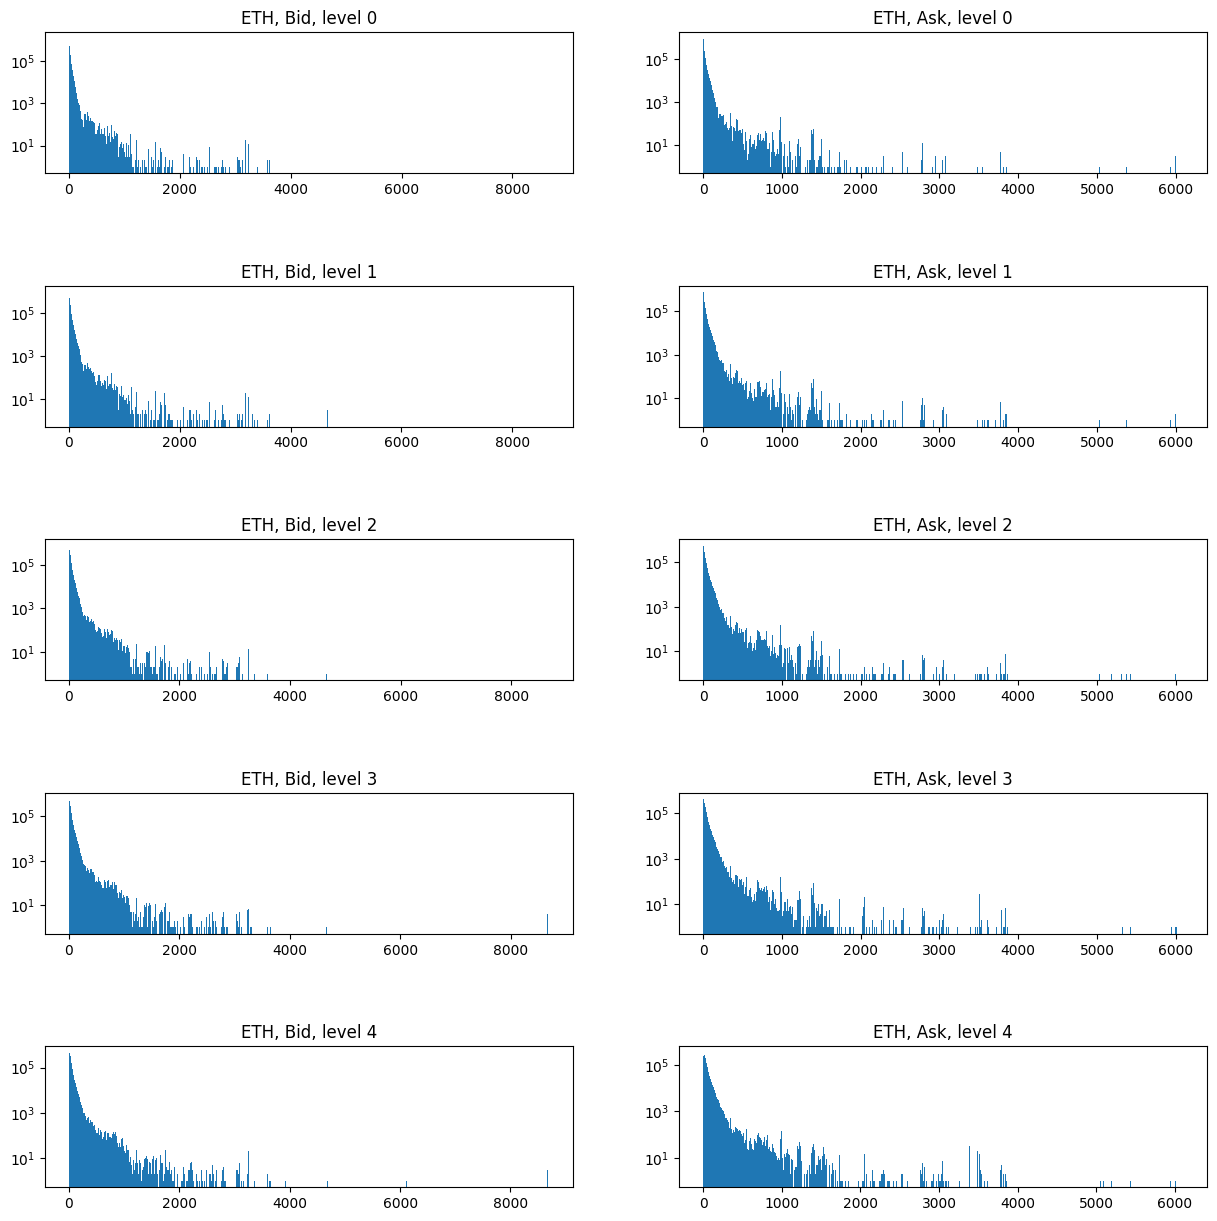

In [21]:
fig, ax = plt.subplots(5, 2, figsize=(15,15))
for i in range(0, 5):
    ax[i, 0].hist(lobs_eth[f'bid_total_vol_{i}'], 1000, log=True)
    ax[i, 0].set_title(f'ETH, Bid, level {i}')
    ax[i, 1].hist(lobs_eth[f'ask_total_vol_{i}'], 1000, log=True)
    ax[i, 1].set_title(f'ETH, Ask, level {i}')
plt.subplots_adjust(hspace=0.8)    
plt.show()

# 4 задание. График пробития стакана от trade size

Здесь мы отдельно рассматриваем bid и ask трейды, и для каждого из этих датафреймов группируем суммарный размер трейда по времени (поскольку есть много трейдов, у которых exchange_ts совпадают).

In [22]:
def squeeze_by_time(series):
    return series.drop(columns=['receive_ts', 'aggro_side', 'price']).groupby(by=['exchange_ts'], as_index=False).sum()

bid_trades_btc = trades_btc[trades_btc['aggro_side'] == 'BID']
bid_trades_btc = squeeze_by_time(bid_trades_btc)

ask_trades_btc = trades_btc[trades_btc['aggro_side'] == 'ASK']
ask_trades_btc = squeeze_by_time(ask_trades_btc)

bid_trades_eth = trades_eth[trades_eth['aggro_side'] == 'BID']
bid_trades_eth = squeeze_by_time(bid_trades_eth)

ask_trades_eth = trades_eth[trades_eth['aggro_side'] == 'ASK']
ask_trades_eth = squeeze_by_time(ask_trades_eth)

Далее с помощью бинарного поиска для каждого момента трейда ищем соответствующие предыдущий и последующий тик стакана. Разницу в ценах между ними мы дальше и считаем.

In [31]:
bid_indices_btc = np.searchsorted(lobs_btc['exchange_ts'], bid_trades_btc['exchange_ts'], side='right')
ask_indices_btc = np.searchsorted(lobs_btc['exchange_ts'], ask_trades_btc['exchange_ts'], side='right')

#для eth берется не берется первый элемент, поскольку 1 трейд случился до 1 записи об ордере
bid_indices_eth = np.searchsorted(lobs_eth['exchange_ts'], bid_trades_eth['exchange_ts'], side='right')[1:]
ask_indices_eth = np.searchsorted(lobs_eth['exchange_ts'], ask_trades_eth['exchange_ts'], side='right')

In [32]:
def get_bestprice_change(i, side, coin):
    if coin == 'btc':
        if side == "BID":
            return lobs_btc['btcusdt:Binance:LinearPerpetual_bid_price_0'][i] - lobs_btc['btcusdt:Binance:LinearPerpetual_bid_price_0'][i-1]
        elif side == "ASK":
            return lobs_btc['btcusdt:Binance:LinearPerpetual_ask_price_0'][i] - lobs_btc['btcusdt:Binance:LinearPerpetual_ask_price_0'][i-1]
    elif coin == 'eth':
        if side == "BID":
            return lobs_eth['ethusdt:Binance:LinearPerpetual_bid_price_0'][i] - lobs_eth['ethusdt:Binance:LinearPerpetual_bid_price_0'][i-1]
        elif side == "ASK":
            return lobs_eth['ethusdt:Binance:LinearPerpetual_ask_price_0'][i] - lobs_eth['ethusdt:Binance:LinearPerpetual_ask_price_0'][i-1]
    
get_bestprice_change = np.vectorize(get_bestprice_change)    

In [33]:
bid_bestprice_changes_btc = get_bestprice_change(bid_indices_btc, "BID", 'btc')
ask_bestprice_changes_btc = get_bestprice_change(ask_indices_btc, "ASK", 'btc')

bid_bestprice_changes_eth = get_bestprice_change(bid_indices_eth, "BID", 'eth')
ask_bestprice_changes_eth = get_bestprice_change(ask_indices_eth, "ASK", 'eth')

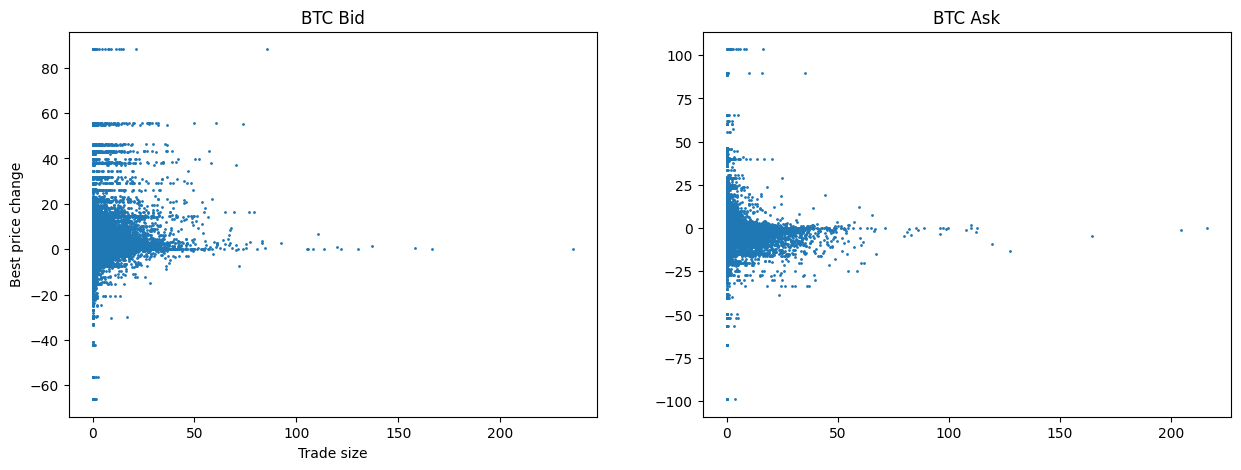

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].scatter(bid_trades_btc['size'], bid_bestprice_changes_btc, s=1)
ax[1].scatter(ask_trades_btc['size'], ask_bestprice_changes_btc, s=1)

ax[0].set_title('BTC Bid')
ax[0].set_xlabel('Trade size')
ax[0].set_ylabel('Best price change')

ax[1].set_title('BTC Ask')
ax[0].set_xlabel('Trade size')
ax[0].set_ylabel('Best price change')
plt.show()

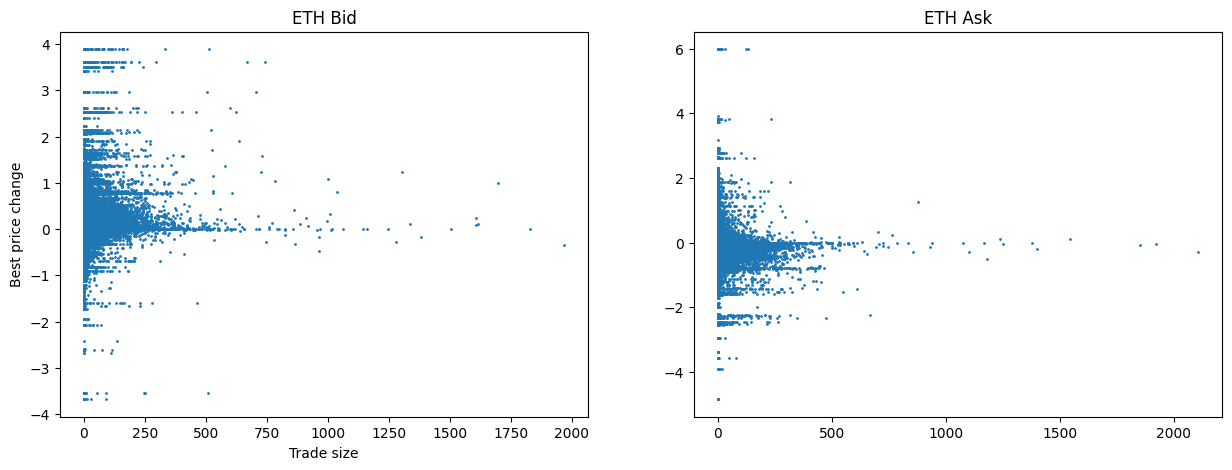

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].scatter(bid_trades_eth['size'][1:], bid_bestprice_changes_eth, s=1)
ax[1].scatter(ask_trades_eth['size'], ask_bestprice_changes_eth, s=1)

ax[0].set_title('ETH Bid')
ax[0].set_xlabel('Trade size')
ax[0].set_ylabel('Best price change')

ax[1].set_title('ETH Ask')
ax[0].set_xlabel('Trade size')
ax[0].set_ylabel('Best price change')
plt.show()